In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame(["this sentence is about whales", 
                   "this sentence is about kangaroos", 
                   "this sentence is about rhinos", 
                   "this is an another sentence about whales",
                   "yet another sentence about kangaroos"])

df.columns = ['text']
df

,text
0,this sentence is about whales
1,this sentence is about kangaroos
2,this sentence is about rhinos
3,this is an another sentence about whales
4,yet another sentence about kangaroos


In [3]:
import nltk

In [4]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)]

df['text_lemmatized'] = df['text'].apply(lemmatize_text)
df['text_lemmatized'] = df['text_lemmatized'].apply(lambda x: ' '.join(x))
df['text_lemmatized']

0               this sentence is about whale
1            this sentence is about kangaroo
2               this sentence is about rhino
3    this is an another sentence about whale
4        yet another sentence about kangaroo
Name: text_lemmatized, dtype: object

In [5]:
df

,text,text_lemmatized
0,this sentence is about whales,this sentence is about whale
1,this sentence is about kangaroos,this sentence is about kangaroo
2,this sentence is about rhinos,this sentence is about rhino
3,this is an another sentence about whales,this is an another sentence about whale
4,yet another sentence about kangaroos,yet another sentence about kangaroo


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
transformer = TfidfVectorizer()
df['vectorized'] = transformer.fit_transform(df['text_lemmatized'])
df['vectorized']

0      (0, 8)\t0.6116585028038916\n  (0, 0)\t0.3612...
1      (0, 8)\t0.6116585028038916\n  (0, 0)\t0.3612...
2      (0, 8)\t0.6116585028038916\n  (0, 0)\t0.3612...
3      (0, 8)\t0.6116585028038916\n  (0, 0)\t0.3612...
4      (0, 8)\t0.6116585028038916\n  (0, 0)\t0.3612...
Name: vectorized, dtype: object

In [8]:
vectorized = df['vectorized'][0].toarray()

In [9]:
results = set()
df['text_lemmatized'].str.lower().str.split().apply(results.update)
print(sorted(results))

['about', 'an', 'another', 'is', 'kangaroo', 'rhino', 'sentence', 'this', 'whale', 'yet']


In [10]:
from nltk.cluster import KMeansClusterer, euclidean_distance, cosine_distance

In [11]:
print('Euclidean distance')
for i in range(10):
    clusterer = KMeansClusterer(3, euclidean_distance, repeats=25)
    clusters = clusterer.cluster(vectorized, True)
    print(clusters)

print('Cosine distance')
for i in range(10):
    clusterer = KMeansClusterer(3, cosine_distance, repeats=25)
    clusters = clusterer.cluster(vectorized, True)
    print(clusters)

Euclidean distance
[2, 1, 0, 2, 1]
[2, 1, 0, 2, 1]
[2, 1, 0, 2, 1]
[2, 1, 0, 2, 1]
[2, 1, 1, 2, 0]
[1, 1, 1, 2, 0]
[2, 1, 0, 2, 1]
[2, 1, 0, 2, 1]
[2, 1, 0, 2, 1]
[2, 1, 0, 2, 1]
Cosine distance
[2, 1, 0, 2, 1]
[2, 1, 1, 2, 0]
[2, 1, 1, 2, 0]
[2, 1, 0, 2, 1]
[2, 1, 1, 2, 0]
[2, 1, 0, 2, 1]
[2, 1, 0, 2, 1]
[2, 1, 1, 2, 0]
[2, 1, 0, 2, 1]
[2, 1, 0, 2, 1]


In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 

In [13]:
?TSNE

In [14]:
tsne_model = TSNE(perplexity=40, metric='euclidean', n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(vectorized)

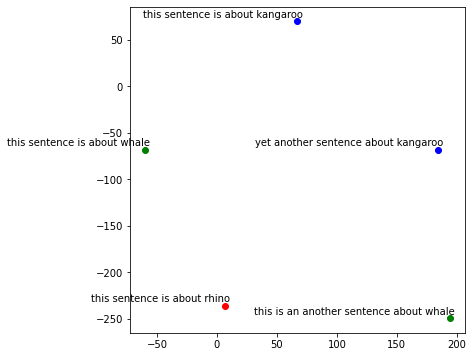

In [15]:
colors = ['red', 'blue', 'green', 'orange', 'purple']

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(6, 6)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i], color=colors[clusters[i]])
    plt.annotate(df['text_lemmatized'][i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()